<h1><center>Markov Chains Project</center></h1>
<h2><center>Team JLRCactus</center></h2>

## Imports ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys as sys

## Main ##

### Variables ###

In [45]:
# Values of dimensions n and m
n = 2000
m = 1000

# Initial random vector
x0 = np.random.randint(low=0, high=2, size=n)*2-1 # A random array of -1 and +1

# To be found vector
X = np.random.randint(low=0, high=2, size=n)*2-1 # A random array of -1 and +1 

# Known matrix W
W = np.random.normal(loc=0, scale=1, size=[m,n]) # W ~ N(0,1)

beta0 = 0.7

### Run ###

## Tools ##

In [3]:
def ReLU(x) :
    return x * (x > 0)

In [9]:
def compute_Y(W, X) :
    n = W.shape[1]
    return ReLU((W @ X)/np.sqrt(n))

In [5]:
def compute_H(W, x, Y) :
    diff = Y - compute_Y(W, x)
    return diff.T.dot(diff)

In [6]:
def random_flip(x) :
    i = np.random.randint(low=0, high=len(x))
    new_x = x.copy()
    new_x[i] = -new_x[i]
    return new_x

In [7]:
def accept(W, x0, x1, beta, Y) :
    return min(1, np.exp(-beta*( compute_H(W, x1, Y) - compute_H(W, x0, Y) )))

In [8]:
def rec_error(x0, X, n):
    n = len(X)
    return (x0-X).T.dot(x0-X) / (4*n)

## Metropolis Algorithm ##

In [79]:
def metropolis(W, X, x0, threshold, beta0) :
    
    e = sys.maxsize
    beta = beta0
    Y_true = compute_Y(W, X)
    n = len(X)
    errors = []
    energies = []
    betas = []
       
    while e > threshold: 
        x1 = random_flip(x0)
        a = accept(W, x0, x1, beta, Y_true)
        
        if a >= np.random.uniform() : # Swap with prob metropolis
            x0 = x1
            
        if (len(energies)> 60 and np.std(energies[-60:]) < 1):
            beta = beta + 0.3
                
        energy = compute_H(W, x0, Y_true)
        energies.append(energy)        
        e = rec_error(x0, X, n)
        errors.append(e)      
        betas.append(beta)
        
    return x0, errors, energies, betas

In [88]:
found_X, errors, energies, betas = metropolis(W, X, x0, 0.4, beta0)

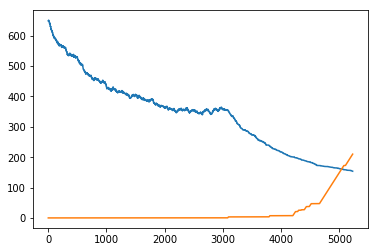

In [89]:
plt.plot(energies)
plt.plot(betas)
plt.show()

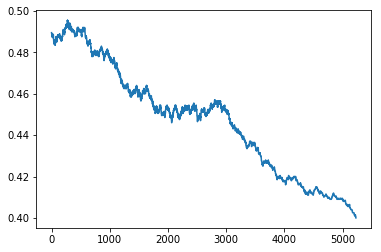

In [90]:
plt.plot(errors)
plt.show()